In [1]:
import numpy as np
import scipy.optimize as opti
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import sys
sys.path.append('/Users/vonderlinden2/rsx_analysis/writing_to_vtk/source')
import structured_3d_vtk as struc_3d

 # Read in data from first 

In [4]:
def read_and_return_sub_grids(file_path, quantity_names, quantity_subgrid_name, index_name):
    r"""
    """
    array_dict = np.load(file_path)
    quantities = [array_dict[quantity_name] for quantity_name in quantity_names]
    
    grid = array_dict['grid']
    quantity_subgrid = array_dict[quantity_subgrid_name]
    
    quantity_index = array_dict[index_name]
    quantity_subindex = np.swapaxes(quantity_index, 0, 1)
    quantity_subindex = quantity_subindex.reshape(quantity_subgrid.shape)
    quantities_on_subgrid = [quantity[0][quantity_subindex[0], quantity_subindex[1], quantity_subindex[2]]
                             for quantity in quantities]
    return quantities_on_subgrid, quantity_subgrid

In [5]:
[b_x, b_y], b_grid = read_and_return_sub_grids('../../writing_to_vtk/output/2016-06-28/all0000.npz', 
                                               ['B_x', 'B_y'], 'b_grid', 'b_indices')

In [6]:
file_path = '../../writing_to_vtk/output/2016-06-28/all'
ending = '.npz' 
b_x_in_time = []
b_y_in_time = []
for time_point in xrange(21):
    name = file_path + str(time_point).zfill(4) + ending
    [b_x, b_y], b_grid = read_and_return_sub_grids(name, ['B_x', 'B_y'], 
                                                   'b_grid', 'b_indices')
    b_x_in_time.append(b_x)
    b_y_in_time.append(b_y)

# Plot vector field in first plane at first time

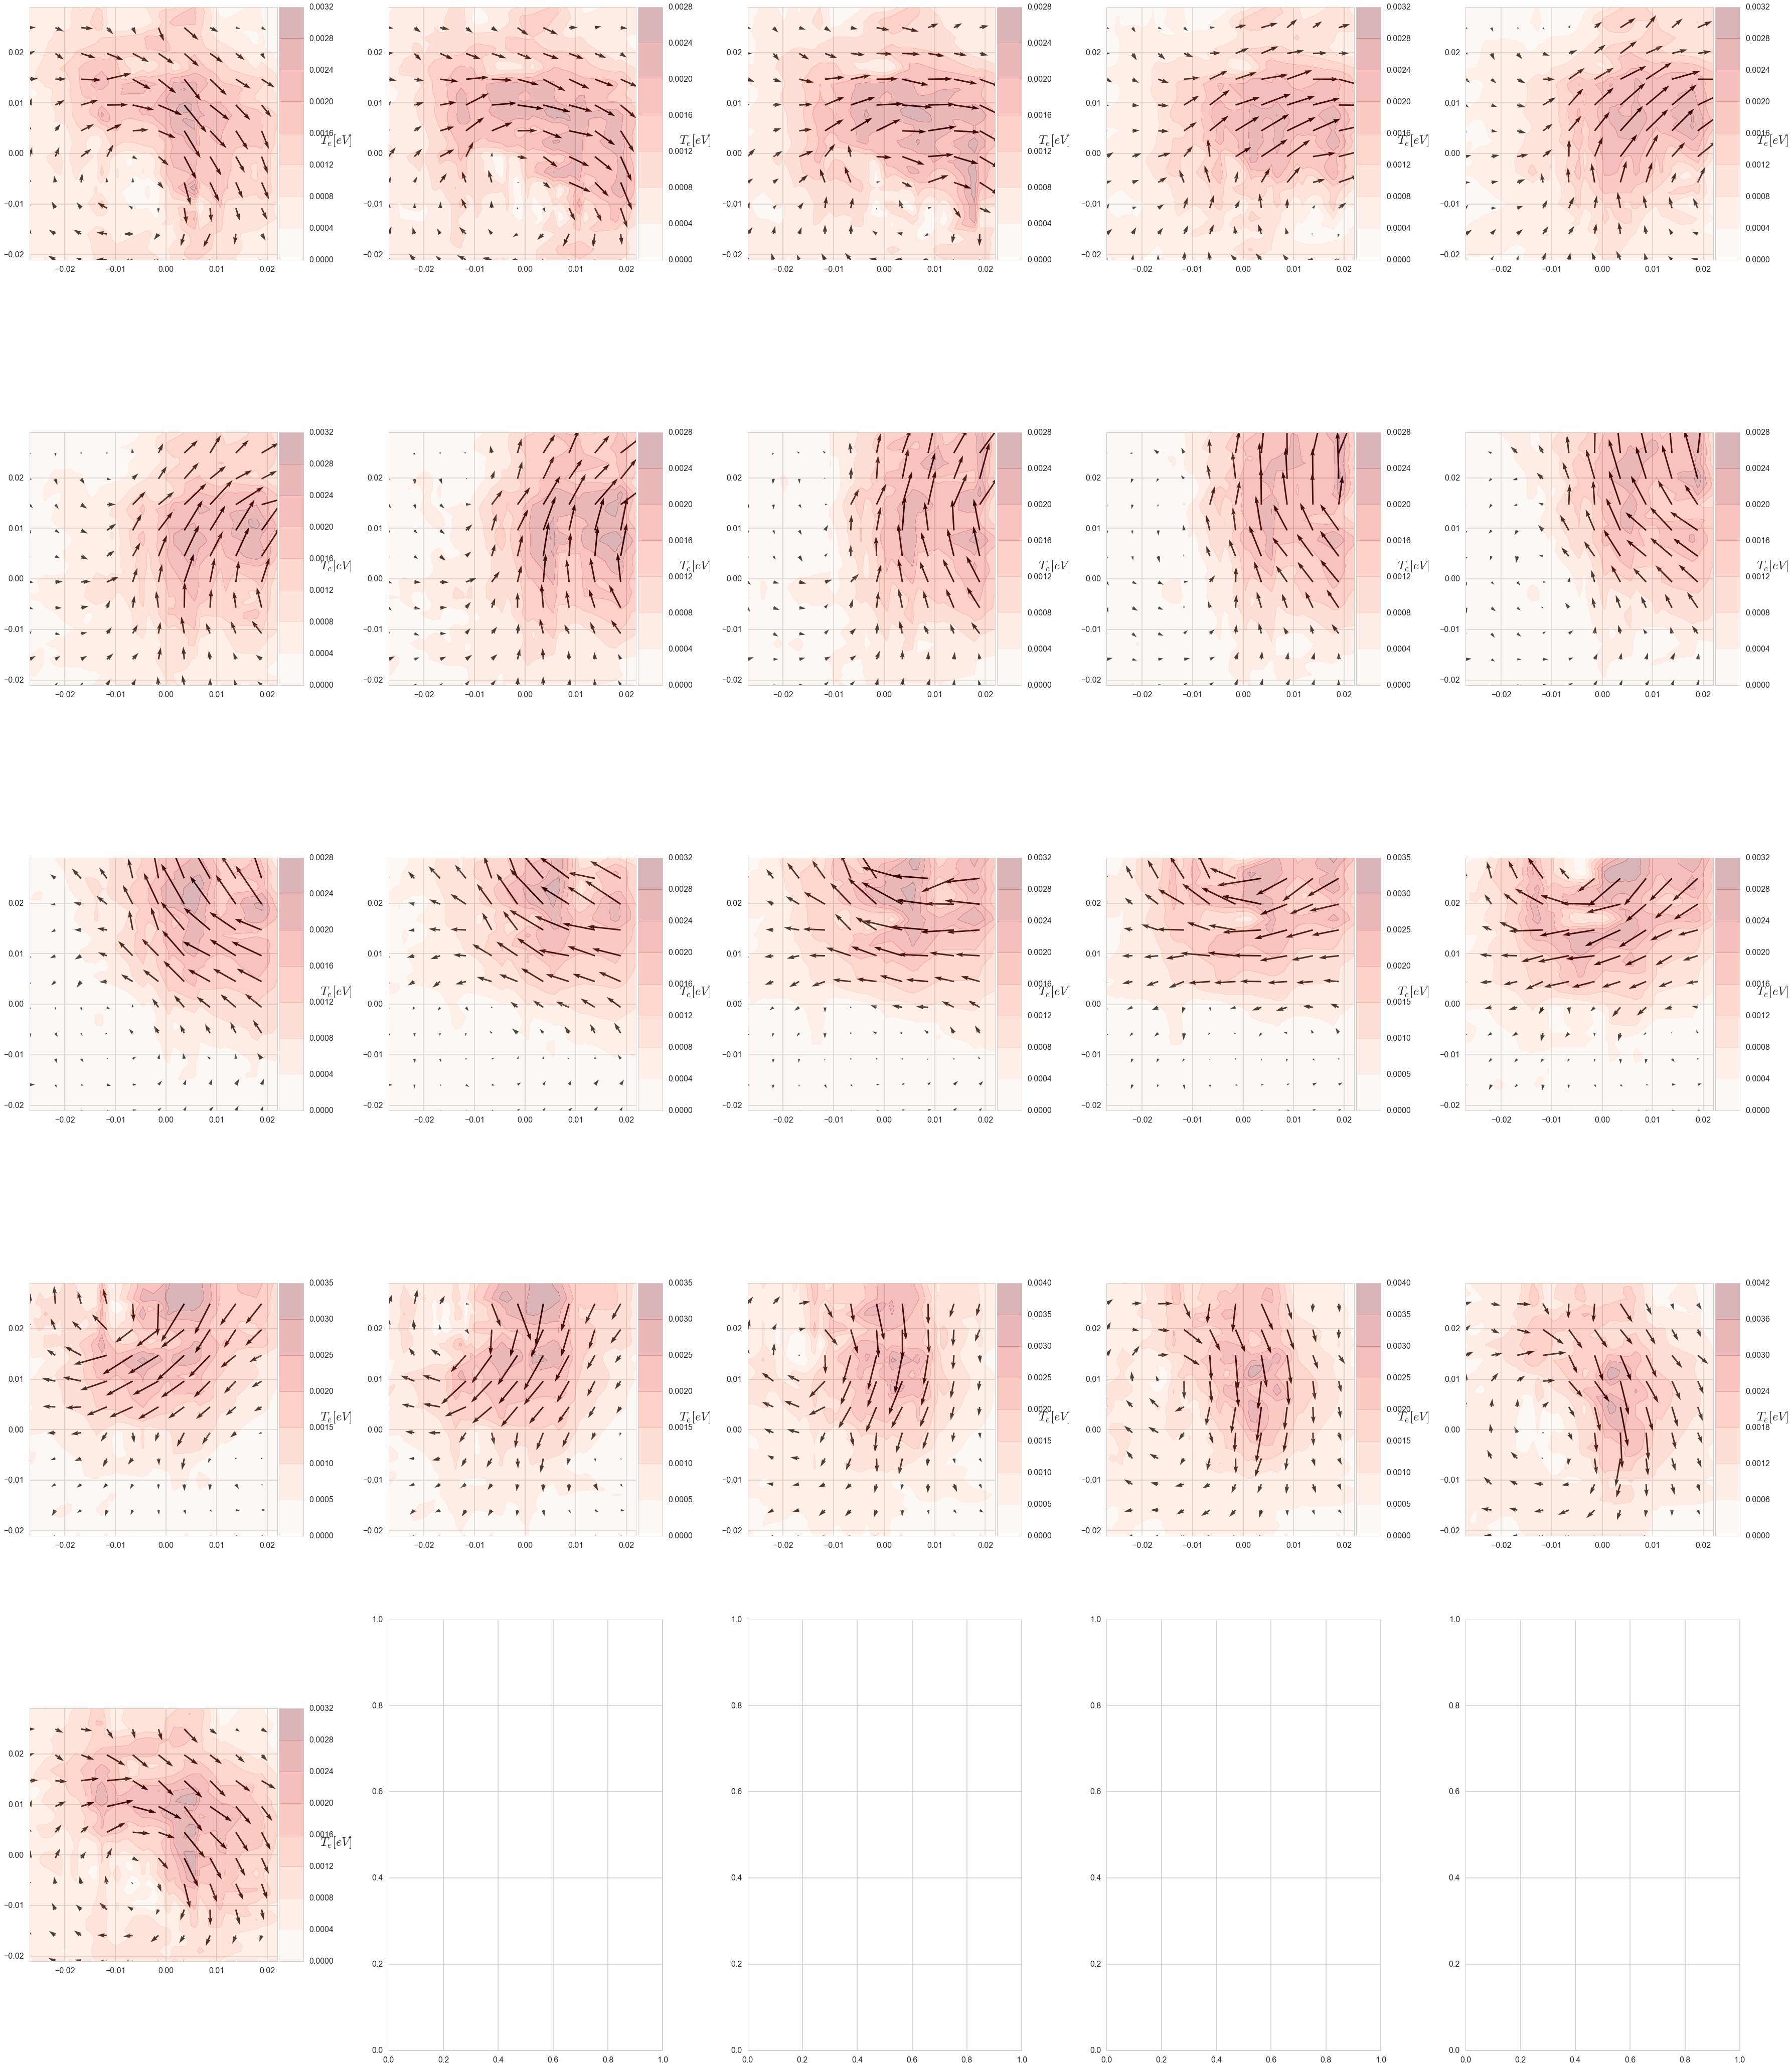

In [7]:
figure, axes = plt.subplots(5, 5, figsize=(50, 60))
for i in xrange(21):
    magnitude = np.sqrt(b_x_in_time[i][:, :, 0]**2 + b_y_in_time[i][:, :, 0]**2)
    axes[i/5][i%5].quiver(b_grid[0, :, :, 0][::5,::5], b_grid[1, :, :, 0][::5,::5], 
                          b_x_in_time[i][:, :, 0][::5,::5], b_y_in_time[i][:, :, 0][::5,::5])
    contour = axes[i/5][i%5].contourf(b_grid[0, :, :, 0], b_grid[1, :, :, 0], magnitude, cmap='Reds', alpha=0.3)
    axes[i/5][i%5].set_aspect('equal')
    divider = make_axes_locatable(axes[i/5][i%5])
    colorbar_axis = divider.append_axes("right", size="10%", pad=0.05)
    colorbar = plt.colorbar(contour, cax=colorbar_axis)
    colorbar.set_label(r'$T_{e} [eV]$', fontsize=25, rotation='horizontal')
plt.tight_layout()

In [8]:
file_path = '../../writing_to_vtk/output/2016-06-28/all'
ending = '.npz' 
te_in_time = []
n_in_time = []
for time_point in xrange(21):
    name = file_path + str(time_point).zfill(4) + ending
    [te, n], tp_grid = read_and_return_sub_grids(name, ['Te', 'n'], 
                                                 'tp_grid', 'tp_indices')
    te_in_time.append(te)
    n_in_time.append(n)

In [9]:
tp_grid[0, :, :, 0].shape

(40, 46)

In [10]:
te[0].shape

(46, 167)

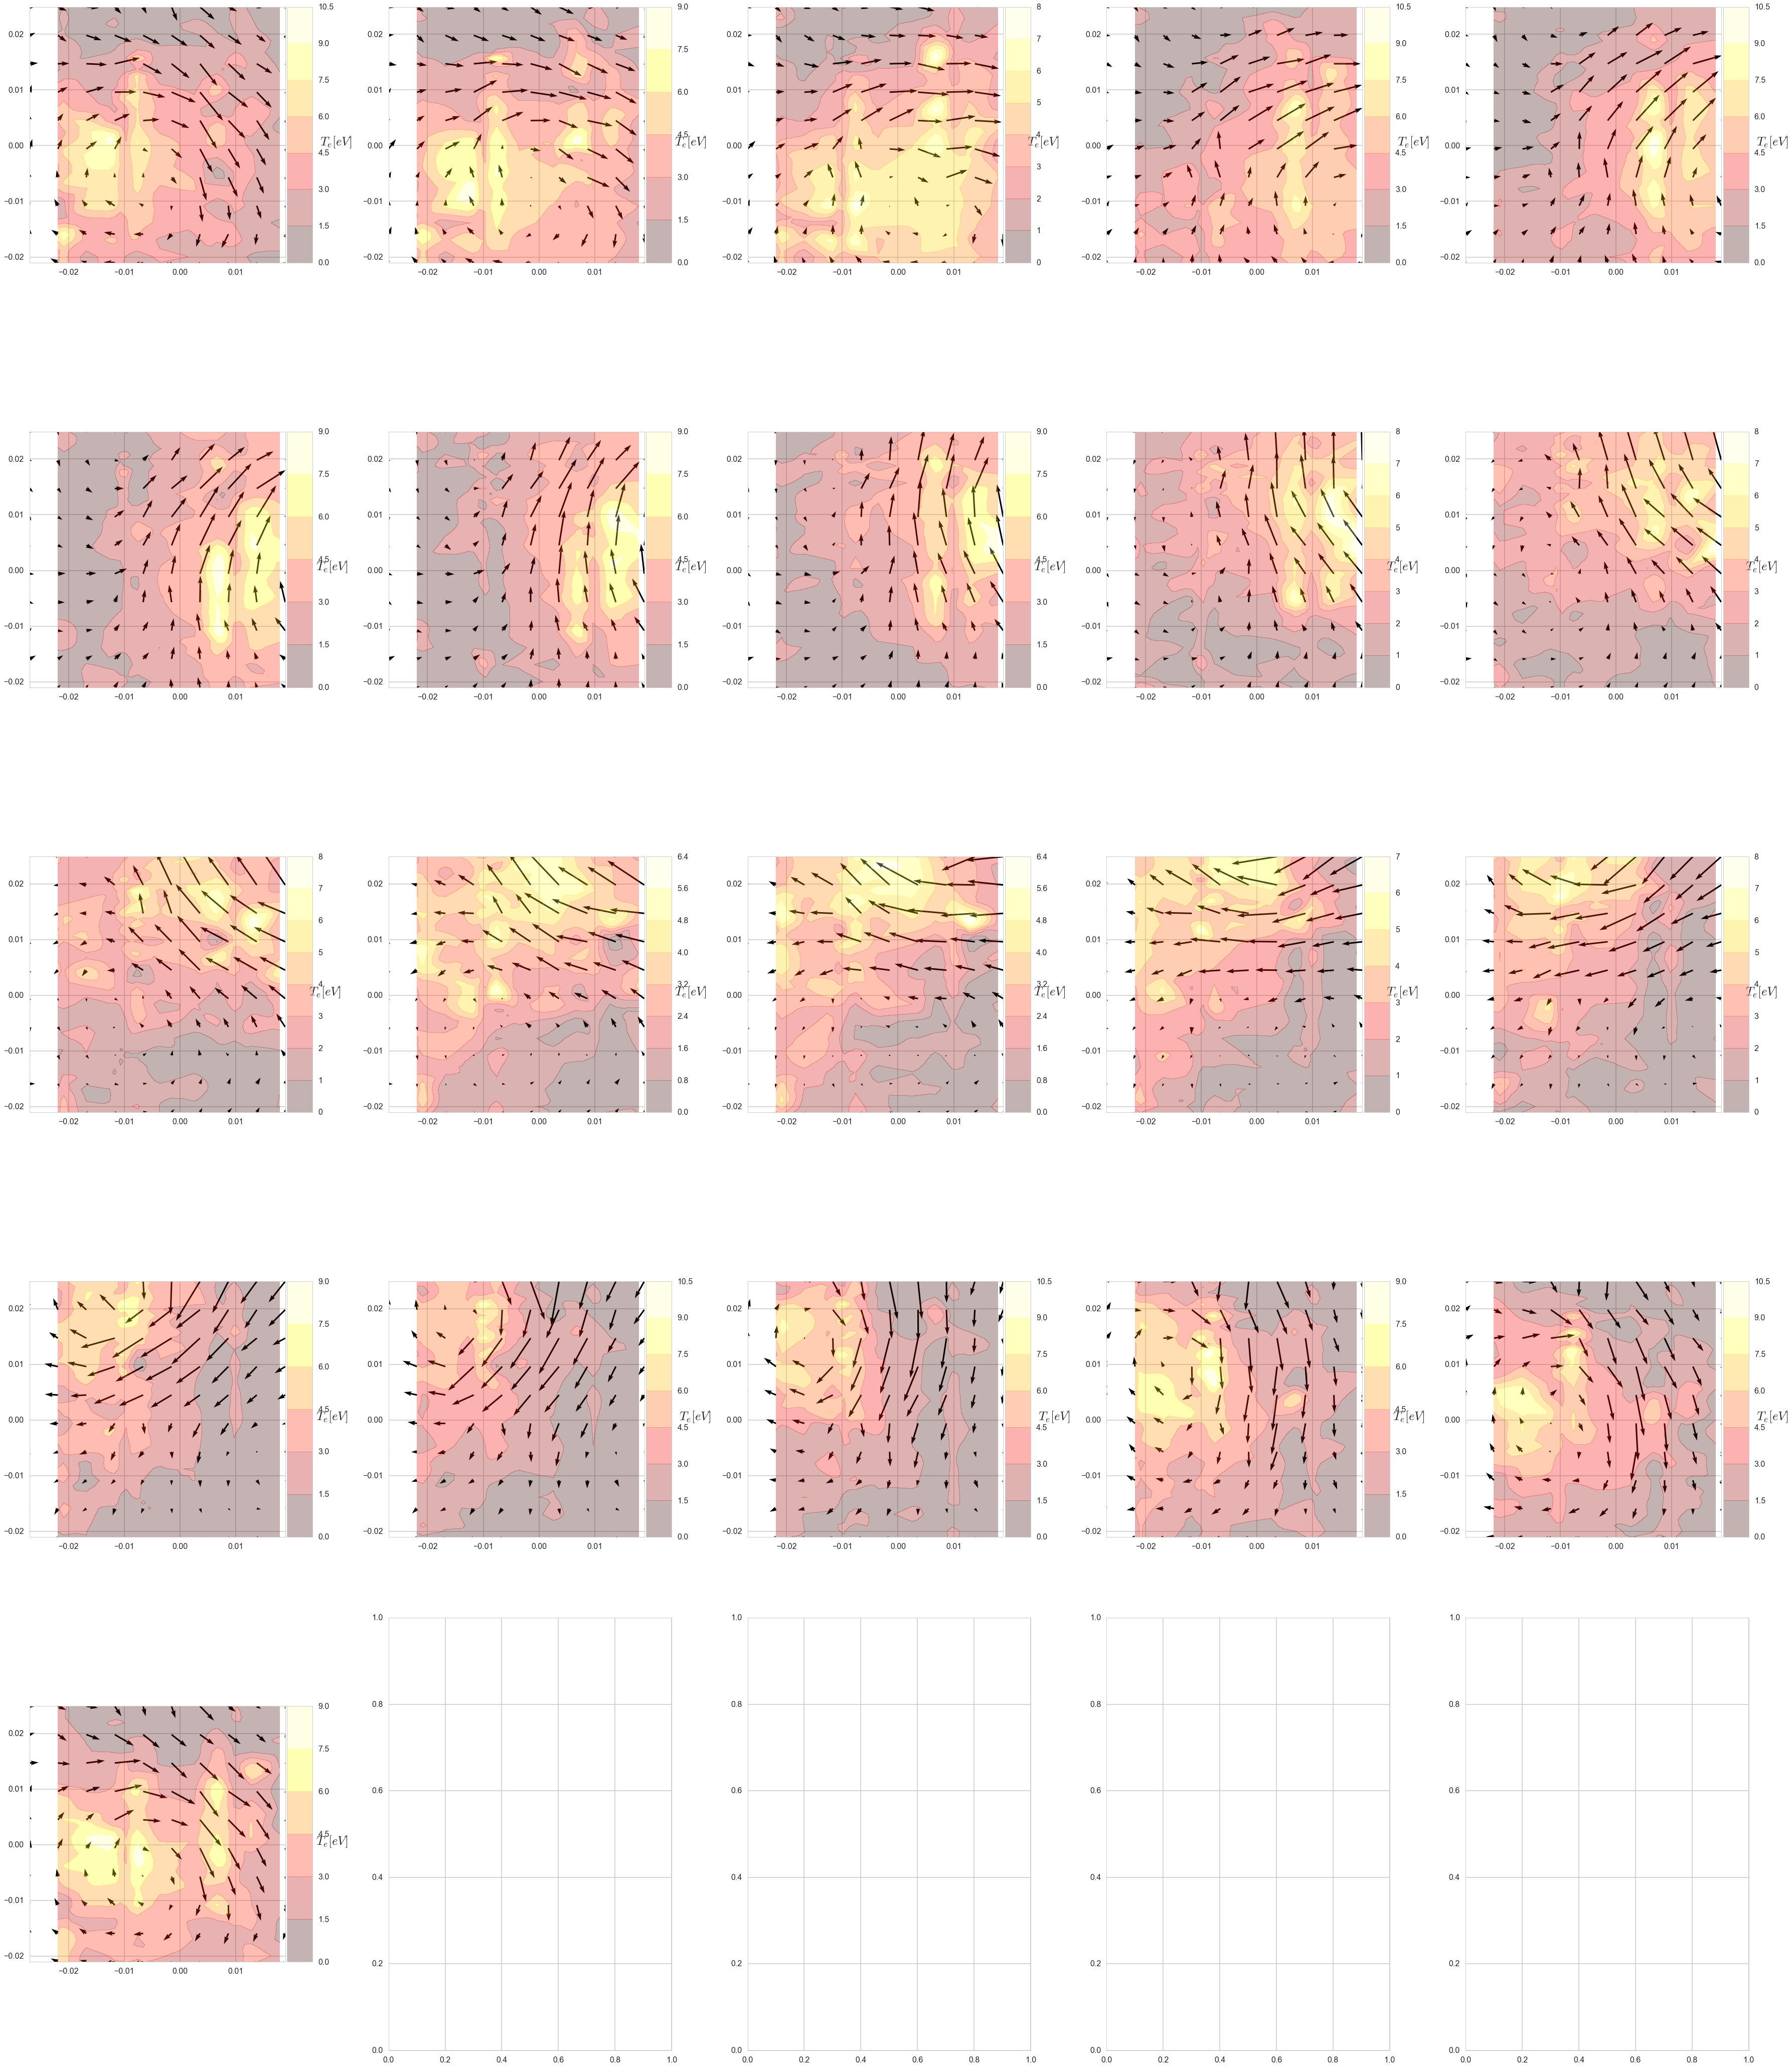

In [11]:
figure, axes = plt.subplots(5, 5, figsize=(50, 60))
for i in xrange(21):
    axes[i/5][i%5].quiver(b_grid[0, :, :, 0][::5,::5], b_grid[1, :, :, 0][::5,::5], 
                          b_x_in_time[i][:, :, 0][::5,::5], b_y_in_time[i][:, :, 0][::5,::5])
    contour = axes[i/5][i%5].contourf(tp_grid[0, :, :, 0], tp_grid[1, :, :, 0], te_in_time[i][:, :, 0], cmap='hot', alpha=0.3)
    axes[i/5][i%5].set_aspect('equal')
    divider = make_axes_locatable(axes[i/5][i%5])
    colorbar_axis = divider.append_axes("right", size="10%", pad=0.05)
    colorbar = plt.colorbar(contour, cax=colorbar_axis)
    colorbar.set_label(r'$T_{e} [eV]$', fontsize=25, rotation='horizontal')
plt.tight_layout()

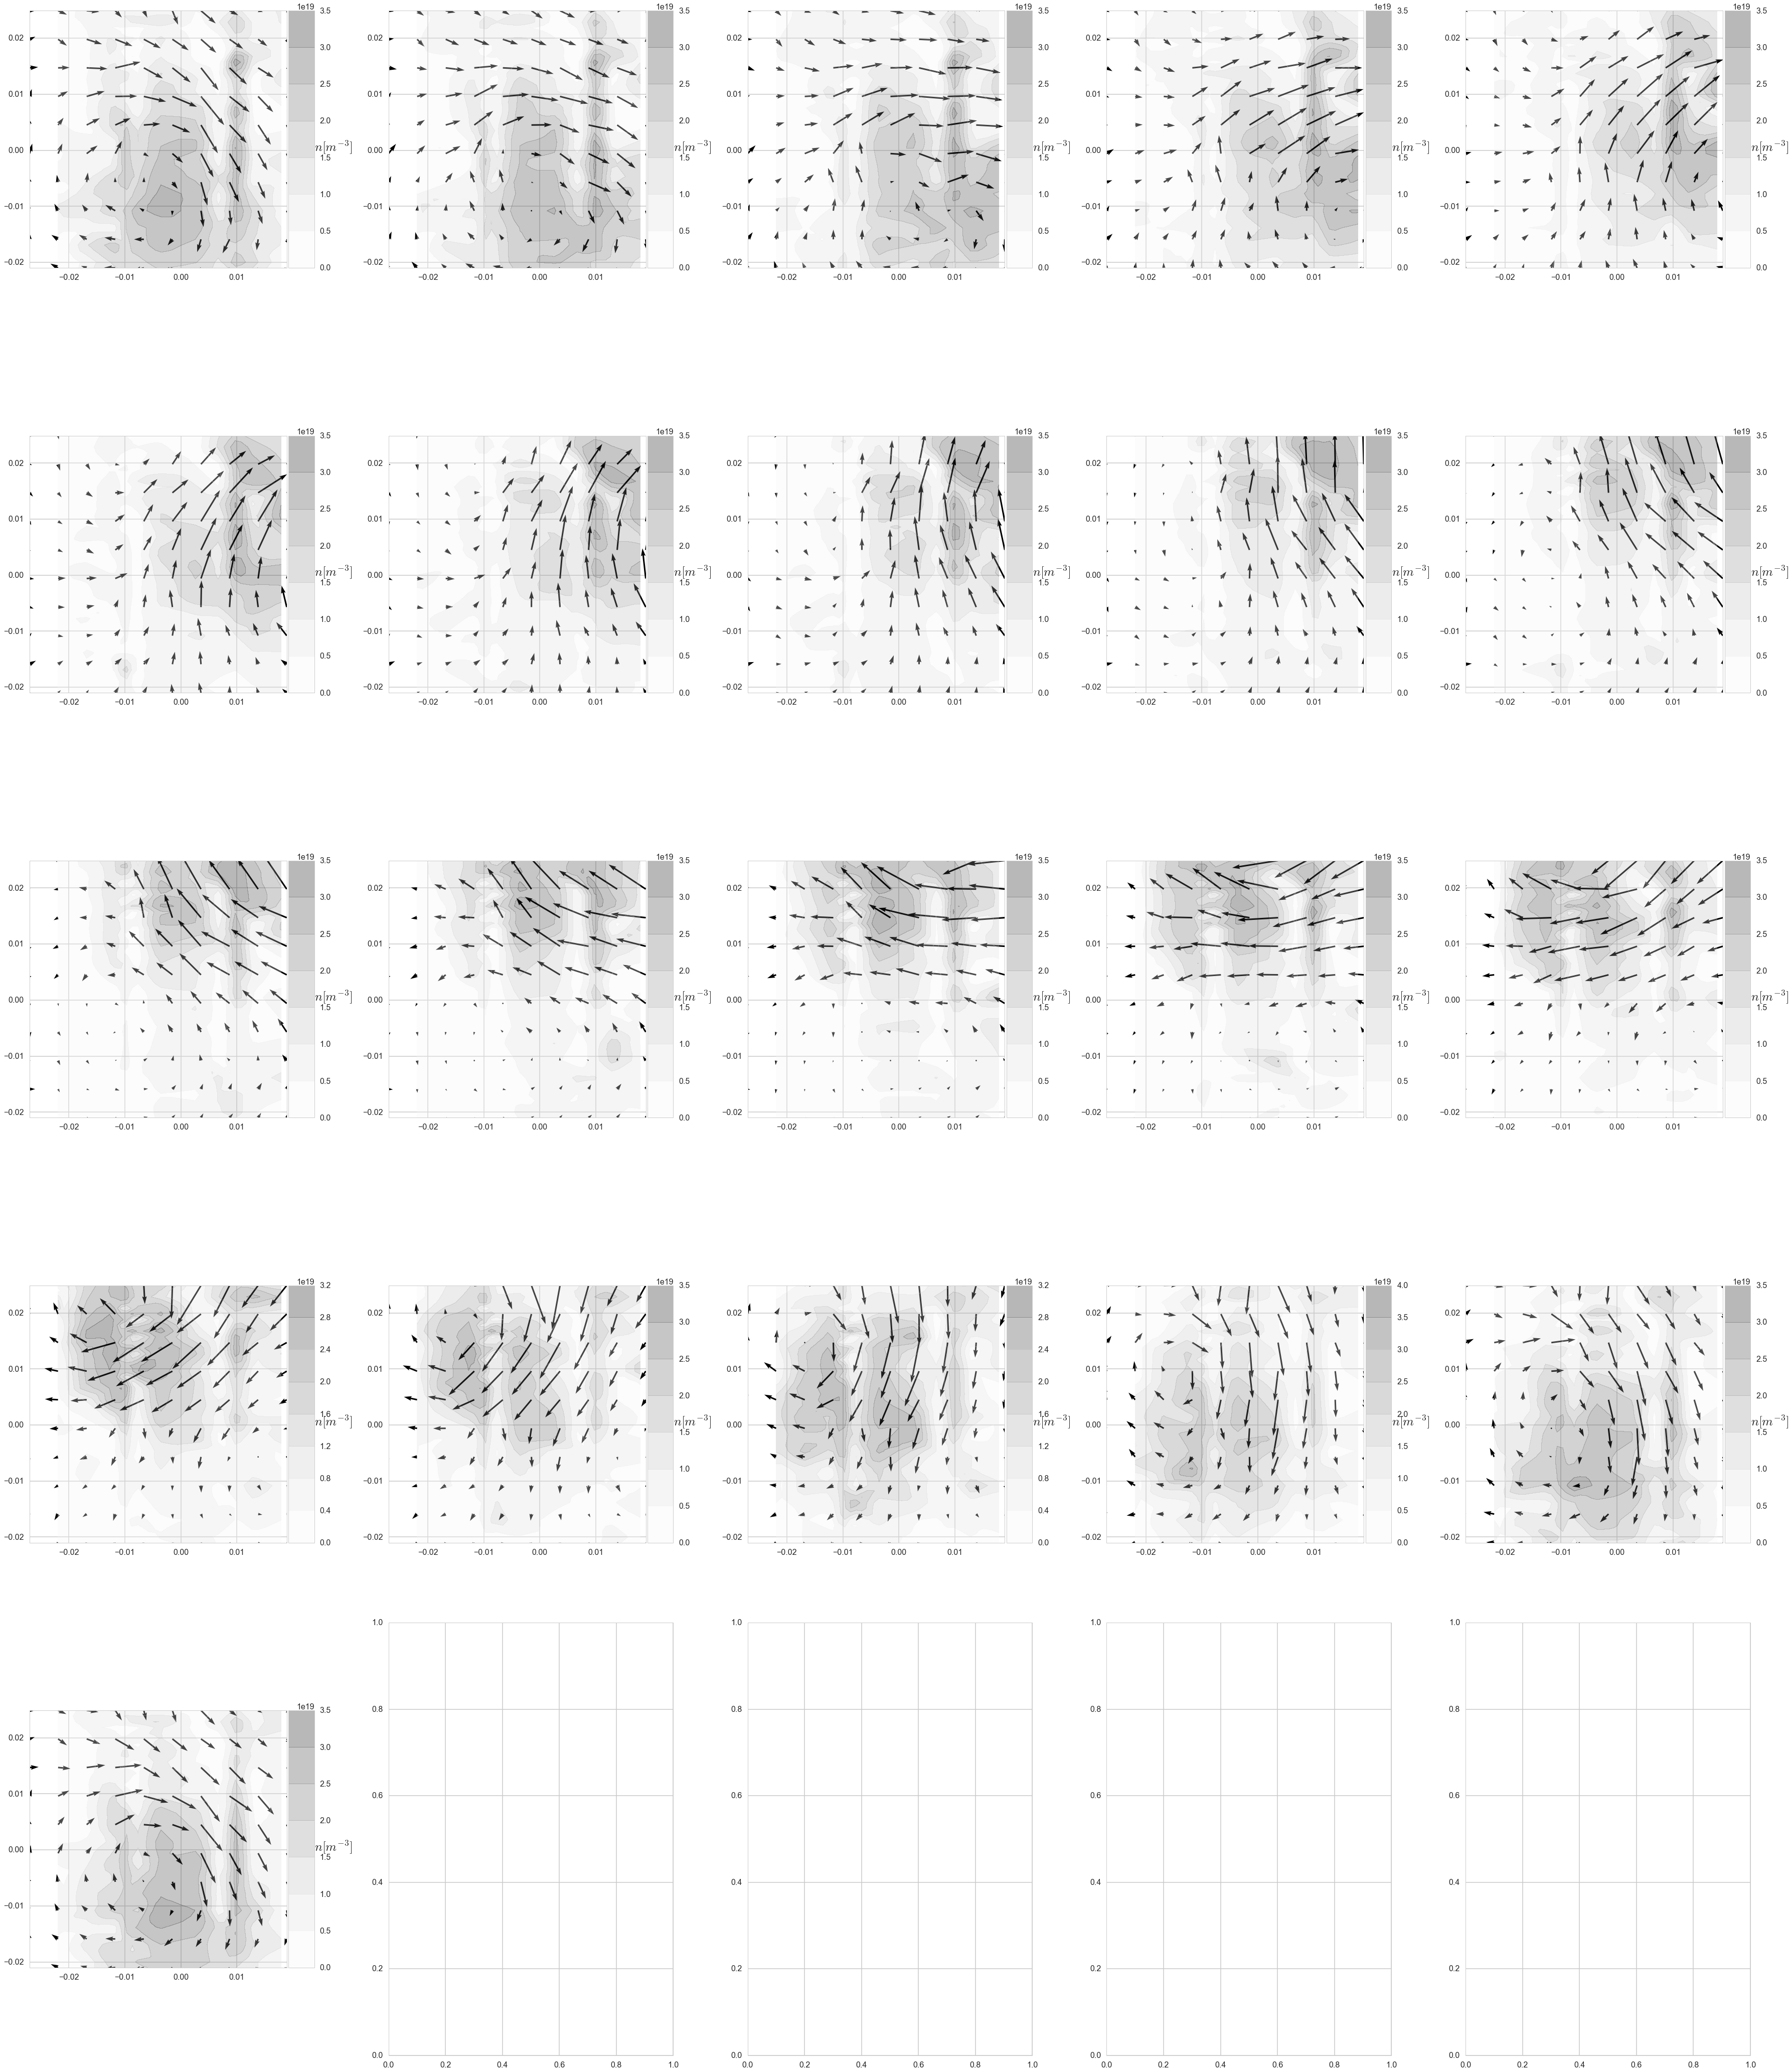

In [12]:
figure, axes = plt.subplots(5, 5, figsize=(50, 60))
for i in xrange(21):
    axes[i/5][i%5].quiver(b_grid[0, :, :, 0][::5,::5], b_grid[1, :, :, 0][::5,::5], 
                          b_x_in_time[i][:, :, 0][::5,::5], b_y_in_time[i][:, :, 0][::5,::5])
    contour = axes[i/5][i%5].contourf(tp_grid[0, :, :, 0], tp_grid[1, :, :, 0], n_in_time[i][:, :, 0], cmap='Greys', alpha=0.3)
    axes[i/5][i%5].set_aspect('equal')
    divider = make_axes_locatable(axes[i/5][i%5])
    colorbar_axis = divider.append_axes("right", size="10%", pad=0.05)
    colorbar = plt.colorbar(contour, cax=colorbar_axis)
    colorbar.set_label(r'$n [m^{-3}]$', fontsize=25, rotation='horizontal')
plt.tight_layout()